In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h2>Part 0: Reading the data</h2>


<h4>
    <ul><li>Please find the data (Fytlyff_DS_Interview.csv) and read it as a Dataframe</li></ul>
</h4>

In [364]:
data = pd.read_csv(r"C:\Users\Danish\Desktop\Data Science\fltrr\Fytlyff_DS_Interview.csv")

print("Total Number of Rows:    ",data.shape[0])
print("Total Number of Columns: ",data.shape[1])
data.head()
# A general view of the data read from csv file

Total Number of Rows:     2160
Total Number of Columns:  10


,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


In [365]:
print("   ","Name of columns/Features")
for ech in range(len(data.columns)):
    print(ech+1,"  ",data.columns[ech])
print("-"*20,"DATA TYPES","-"*20)
print("   ","Data type of columns/Features")
for ech in range(len(data.columns)):
    print(ech+1,"  ",data.dtypes[ech])

    Name of columns/Features
1    Year
2    Month
3    MobileWeb_or_Web
4    Type_of_Customers?
5    Where_Are_They_comming_from?
6    Which_Place_in_India?
7    How_many_Landed_on_our_Page?
8    How_many_Landed_on_the_our_Page_and_clicked_on_a_button?
9    How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?
10    How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
-------------------- DATA TYPES --------------------
    Data type of columns/Features
1    int64
2    object
3    object
4    object
5    object
6    object
7    float64
8    float64
9    int64
10    int64


<h2>Part 1: Data cleaning</h2>

<h4>
    <h6>
        Write a function called data_cleaning() which, when called, would perform the following activity:
    </h6>
    <ul>
        <li>1. Replaces the NA values with 0s in the data</li>
        <li>2. In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…</li>
        <li>3. In column ‘E’ Replace “Came_From_Google” with “Google” and
“Landed_on_the_page_Directly” with “Direct_traffic</li>
    </ul>
</h4>



In [366]:
monthDict={'Jan':1,'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
           'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

# data_cleaning function
def data_cleaning(d):
    
     # 1. Replaces the NA values with 0s in the data
    d.fillna(0,inplace=True)
    
    # 2. In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…
    d['Month'] = monthDict.get(d['Month'],0)
        
    # 3. In column ‘E’ Replace “Came_From_Google” with “Google” and
    # “Landed_on_the_page_Directly” with “Direct_traffic
    if d["Where_Are_They_comming_from?"] == "Came_From_Google":
        d["Where_Are_They_comming_from?"] = "Google"
        #for "Came_From_Google": TO "Google"
    
    if d["Where_Are_They_comming_from?"] == "Landed_on_the_page_Directly":
        d["Where_Are_They_comming_from?"]= "Direct_traffic"
       # "Landed_on_the_page_Directly": TO "Direct_traffic"
    return d

data=data.apply(
    data_cleaning, # funciton call 
    axis=1,
    result_type='expand')


# data.Month = data.Month.astype(str)
# data.Year = data.Year.astype(str)

<h2>Part 2: Descriptive statistics</h2>

<h4>
    <h6>Write a function called descriptive_stats () which, when called, would perform the following activity:</h6>
    <ul>
        <li>1. Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical
columns</li>
        <li>2. Produce a list of all the unique values & data types present in the non-numeric columns</li>
    </ul>
</h4>



In [367]:
stat_names = ["Mean", "Median", "Quartile", "standard deviation"]

def descriptive_stats(x):
    column_labels=(x.columns)
    # each column name is stored in column_labels variable
    num_dict={}
    # Numeric_columns varialbe will contain the name of numeric columns labels
    non_num_dict={}
    # Non_Numeric_columns varialbe will contain the name of non numeric columns labels

#     1. Generates the summary statistics (Mean, Median, Quartile, standard deviation)
#     of all the numerical columns

    for label in range(len(column_labels)):
        # This will Filter the Column Name with their respective variable 
        # according to the Type of the data into the respective column
        if np.issubdtype(x[column_labels[label]].dtype, np.number):
            num_dict[column_labels[label]] = list(x[column_labels[label]])
        else:
            non_num_dict[column_labels[label]] = list(x[column_labels[label]])
    
    df_dict = {}
    list_keys = list(num_dict.keys())
    list_value = list(num_dict.values())
    df2 = pd.DataFrame(data=non_num_dict)
    
    # these list are create to make a data frame that can be easily understood
    # other wise output will not be clearly understood when printed
    mn=[]
    md=[]
    qtl=[]
    sd=[]
    
    for ele in range(len(list_keys)):
        mn.append(np.mean(list_value[ele]))
        md.append(np.median(list_value[ele]))
        qtl.append(np.quantile(list_value[ele],[0.25,0.75]))
        sd.append(np.std(list_value[ele]))
    stat_values=[mn,md,qtl,sd]
    
    for u in range(len(stat_values)):
        df_dict[stat_names[u]] = stat_values[u]

    df = pd.DataFrame(data=df_dict,index=list_keys)
    
    #PART 2
    # 2. Produce a list of all the unique values &
    #  data types present in the non-numeric columns

    key_list = list(non_num_dict.keys())
    val_list = list(non_num_dict.values())
    
    for ech_el in range(len(key_list)):
        print(ech_el+1,"list of all the unique values in: ",
              key_list[ech_el],"& Data type(dtype) of Column","\n",
              df2[key_list[ech_el]].value_counts())
        print("-"*100)
    return df
        
df=descriptive_stats(data)

print("Mean", "Median", "Quartile", "standard deviation","information" )
df.head()


1 list of all the unique values in:  MobileWeb_or_Web & Data type(dtype) of Column 
 Desktop_Website    1080
Mobile_website     1080
Name: MobileWeb_or_Web, dtype: int64
----------------------------------------------------------------------------------------------------
2 list of all the unique values in:  Type_of_Customers? & Data type(dtype) of Column 
 Existing_Customer    1080
New_Customer         1080
Name: Type_of_Customers?, dtype: int64
----------------------------------------------------------------------------------------------------
3 list of all the unique values in:  Where_Are_They_comming_from? & Data type(dtype) of Column 
 Google                  720
Direct_traffic          720
Unidentified_Sources    720
Name: Where_Are_They_comming_from?, dtype: int64
----------------------------------------------------------------------------------------------------
4 list of all the unique values in:  Which_Place_in_India? & Data type(dtype) of Column 
 Bangalore    432
Chennai     

,Mean,Median,Quartile,standard deviation
Year,2020.000000,2020.0,"[2019.0, 2021.0]",0.816497
Month,6.500000,6.5,"[3.75, 9.25]",3.452053
How_many_Landed_on_our_Page?,392247.442593,12283.5,"[0.0, 381642.25]",955356.104550
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,179228.131944,4212.5,"[0.0, 173045.25]",395064.739875
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,151072.456019,70649.5,"[33608.0, 165959.0]",235299.336549


<h4>Some important points about Part 2: Descriptive statistics (descriptive_stats())
    function </h4>
    <ul>
    <li>Data passed to the descriptive_stats() should be pd.dataframe type (remaining not tested)</li>
    <li>function generate two out puts 1--(by print() of python) 2--(dataFrame) </li>
    <li>1 print() give out of "Produce a list of all the unique values data types present in the non-numeric columns" of this part of the quesiton</li>
    <li>2 is DataFrame give Mean, Median, Quatile, Standard deviation of each colum mention in the index (row wise) in data Frame</li>
    <li>Quartile values 25th percentile and 75th percentile are calculated in list</li>
    <li>This function is dependend up on numpy and pandas</li>
    </ul>

<h2>Part 3: Prescriptive statistics</h2>

<h4>
    <h6>Can you write code and present the data which would help us answer (Text in “” are column names):</h6>
    <ul>
        <li>1. “Which_Place_in_India?” has the highest “How_many_Landed_on_the_our_Page?”</li>
      <li>2.“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form
and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is
highest for “Which_Place_in_India?”</li>
    </ul>
</h4>


In [368]:
# 1. “Which_Place_in_India?” has the highest “How_many_Landed_on_the_our_Page?”

result =data[["Which_Place_in_India?","How_many_Landed_on_our_Page?"]].max()
print(result)

Which_Place_in_India?                 Pune
How_many_Landed_on_our_Page?    11274131.0
dtype: object


In [369]:
# 2.“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form and_Completed_and_submited_the_form?”
# divided by
# “How_many_Landed_on _our_Page?”
# is highest for “Which_Place_in_India?”

grouped_data = (
    data.groupby(
        ["Which_Place_in_India?"])[
        "How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?"
    ].sum())/(data.groupby(
    ["Which_Place_in_India?"])["How_many_Landed_on_our_Page?"].sum())

print(" place is: ",grouped_data.idxmax(),"\n",
      "value is: ",grouped_data.max(),)

 place is:  Bangalore 
 value is:  0.19752416721431196


<h2>Part 4: Simple Machine learning questions</h2>
<h4>
    <h6>Write a function called pred_future() which, when called, would perform the following activity:</h6>
    <ul>
        <li>1. Predict
“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form
_and_Completed_and_submited_the_form?” for the complete year of 2022</li>
      <li>2. Generate the overall MAPE of your prediction for the year 2021.</li>
    </ul>
</h4>

In [370]:
print(data.shape)
# data.head(60)


df=data[['Year','Month','How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']]
df=df.rename(columns = {"How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?":'Landed'})
print(df.shape)
# df

(2160, 10)
(2160, 3)


In [371]:
df19 = df[df["Year"]==2019].reset_index(drop=True)

In [372]:
df20 = df[df["Year"]==2020].reset_index(drop=True)
# df20.head()

In [373]:
df21 = df[df["Year"]==2021].reset_index(drop=True)
# df21.head()

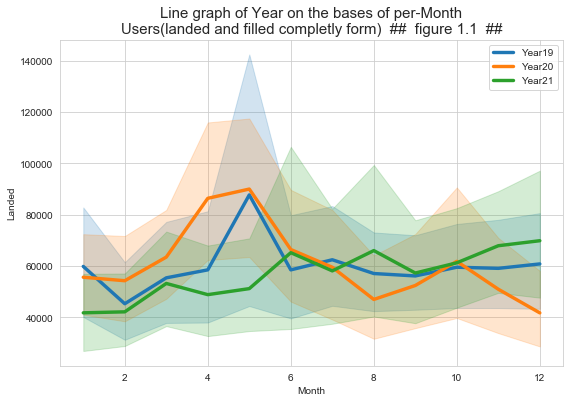

In [374]:
plt.figure(figsize=(9,6))
plt.title("""Line graph of Year on the bases of per-Month
Users(landed and filled completly form)  ##  figure 1.1  ##""",fontsize=15)
sns.lineplot(x='Month',y="Landed",  label = 'Year19', data=df19, palette="YlOrBr",linewidth=3.4) 
sns.lineplot(x='Month',y="Landed",  label = 'Year20', data=df20,palette="Blues_r",linewidth=3.4)
sns.lineplot(x='Month',y="Landed",  label = 'Year21', data=df21,palette="RdGy",linewidth=3.4)

plt.show()
# df20

In [375]:
def merge_date(x):
    y=str(x["Year"])+"-"+str(x["Month"])
    return y

In [376]:
df_19=df19.groupby(["Month","Year"])["Landed"].sum()
df_19=df_19.reset_index()
df_19["Year_month"]=df_19.apply(merge_date,axis=1)
df_19.Year_month=df_19.Year_month .astype(np.datetime64())

In [377]:
df_20=df20.groupby(["Month","Year"])["Landed"].sum()
df_20=df_20.reset_index()

df_20["Year_month"]=df_20.apply(merge_date,axis=1)
df_20.Year_month=df_20.Year_month .astype(np.datetime64())


In [378]:
df_21=df21.groupby(["Month","Year"])["Landed"].sum()
df_21=df_21.reset_index()

df_21["Year_month"]=df_21.apply(merge_date,axis=1)
df_21.Year_month=df_21.Year_month .astype(np.datetime64())


In [379]:
l=np.array((df_19["Landed"]+df_21["Landed"]+df_21["Landed"])/3,dtype= np.int64)
df_22=pd.DataFrame(data={"Year":2022,"Month":df_19["Month"],"Landed":l})

df_22["Year_month"]=df_22.apply(merge_date,axis=1)
df_22.Year_month=df_22.Year_month .astype(np.datetime64())


test_y=df_22["Year_month"]

In [380]:
df_sum = pd.concat([df_19,df_20,df_21])
df_sum.columns
y=df_sum['Year_month']
x=df_sum.drop(columns=['Year_month',"Year","Month"])

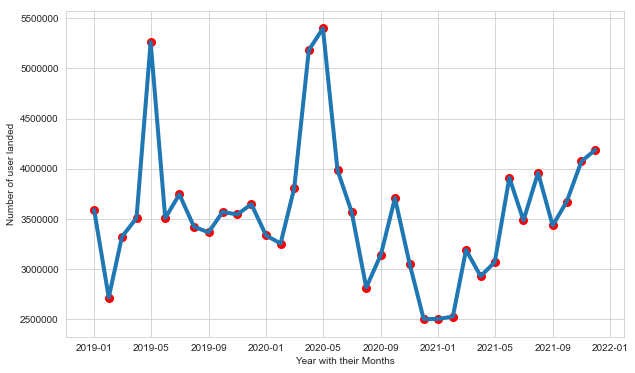

In [381]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year_month',y="Landed",data=df_sum,linewidth=4)
plt.scatter(df_sum.Year_month,df_sum.Landed,linewidth=3,color="red",)
plt.xlabel("Year with their Months")
plt.ylabel("Number of user landed")
plt.show()


In [382]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [383]:

X_train,x_test,Y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=50)
print(X_train.shape,x_test.shape)
print(Y_train.shape,y_test.shape)
# y_test.head()

(25, 1) (11, 1)
(25,) (11,)


,Landed,Year
31,3959670,32
32,3434896,33
33,3673751,34
34,4072884,35
35,4189930,36


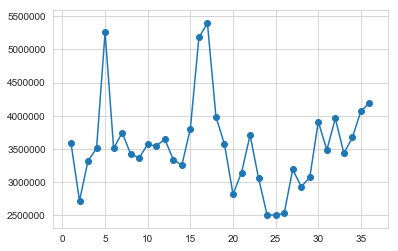

In [384]:
Months=list(range(1,37))
landed = list(df_sum["Landed"])
dic = dict(zip(Months,landed))
sns.lineplot(x=dic.keys(),y=dic.values())
plt.scatter(x=dic.keys(),y=dic.values())
reg_data=pd.DataFrame(data={"Landed":dic.values(),"Year":dic.keys()})
reg_data.tail()

In [385]:

y=reg_data['Year']
x=reg_data.drop(columns=['Year'])

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=0)


In [386]:
from sklearn.linear_model import LinearRegression

In [112]:
y_pred = reg.predict(x_test)
print(y_pred)


[3367556.33748773 3433658.67321643 3457695.88620868 3373565.64073579
 3421640.0667203  3463705.18945675 3493751.70569707 3541826.13168158
 3487742.402449   3379574.94398386 3391593.55047998]


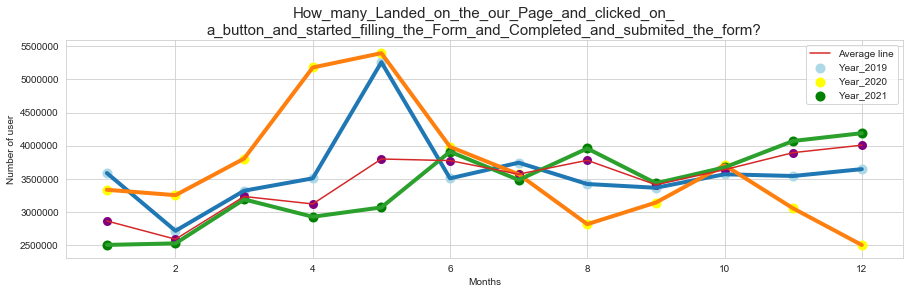

In [234]:
plt.figure(figsize=(15,4))
sns.set_style('whitegrid')
plt.title("""How_many_Landed_on_the_our_Page_and_clicked_on_
a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?""",fontsize=15)

sns.lineplot(x='Month',y="Landed",data=df_19,linewidth=4)
plt.scatter(df_19.Month,df_19.Landed,label="Year_2019",linewidth=4,color="lightblue",)
sns.lineplot(x='Month',y="Landed",data=df_20,linewidth=4)
plt.scatter(df_20.Month,df_20.Landed,label="Year_2020",linewidth=4,color="yellow",)
sns.lineplot(x='Month',y="Landed",data=df_21,linewidth=4)
plt.scatter(df_21.Month,df_21.Landed,label="Year_2021",linewidth=4,color="green",)
sns.lineplot(x='Month',y="Landed", data=df_22,label="Average line")
plt.scatter(df_22.Month,df_22.Landed,label="Year_2021",linewidth=3,color="purple",)



plt.xlabel("Months")
plt.ylabel("Number of user")
plt.show()


In [387]:
sum_df=pd.DataFrame()
sum_df["Landed"] =df19.groupby(["Month"])["Landed"].sum().reset_index(drop=True)
sum_df["Month"]=df_19["Month"]

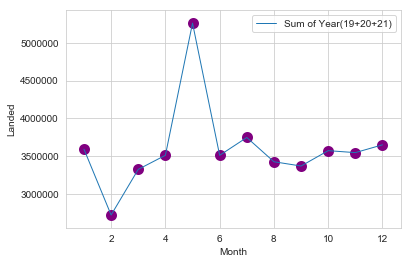

In [389]:
sns.lineplot(x='Month',y=sum_df["Landed"], data=sum_df,linewidth=1,label="Sum of Year(19+20+21)")
plt.scatter(sum_df.Month,sum_df.Landed,linewidth=5,color="purple",)
plt.show()


In [390]:
lm=LinearRegression()
lm.fit(df_22[["Month"]],df_22.Landed)

LinearRegression()

In [391]:
x_test
t_22 =pd.DataFrame(data=list(range(13,25)))
# t_22
# print(type(t_22))

In [392]:
# y_Pred =lm.predict(t_22)
# y_Pred=np.array(y_Pred,dtype=np.int64)
# print(y_Pred)

In [393]:
def Pred_future(x):
#     y_Pred=np.array(y_Pred,dtype=np.int64)
    v= dict(zip(t_22[0],y_Pred))
    print("For the Next Year {} User that Land and completly fill form will be probably:".format(x))
    print(v)
Pred_future(2022)

For the Next Year 2022 User that Land and completly fill form will be probably:
{13: 4119143, 14: 4218205, 15: 4317267, 16: 4416329, 17: 4515391, 18: 4614453, 19: 4713515, 20: 4812577, 21: 4911639, 22: 5010701, 23: 5109763, 24: 5208825}


<h4>There is lot of Analysis that i did. Now i will discuss some of the points :</h4>
<ul>
    <li>1. I trie different method out of them i choose the Average method.</li>
    <li>2. In Average method i pick value from the all the year <br>and sum them up with repect their corresponding year
    And devide the by 3 because year are given 3.</li>
    <li>3. Then i trained the linear regression mode on top of it which gave me the abve line(green).</li>
    <li>....</li>
    <li>....</li>


</ul>


<h2>2. Generate the overall MAPE of your prediction for the year 2021.</h2>

In [394]:
forcast=y_Pred
actual=list(df_21["Landed"])
APE = []
for day in range(len(actual)):
    per_err = (actual[day] - forcast[day]) / actual[day]
    per_err = abs(per_err)
    APE.append(per_err)
MAPE = sum(APE)/len(APE)

print(f'''
MAPE : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')



MAPE : 0.39
MAPE % : 39.03 %



<h1>Part 5: Visualization</h1>
<ul>● Please write a code to display :
<li>1. A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the
    different “Which_Place_in_India?” over the months of the year 2019 & 2020.</li>
<li>2. A line graph of the actual and projected number of
“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form
    _and_Completed_and_submited_the_form?” for the months of the year 2021 & 2022</li></ul>

<h3>1. A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020.</h3>

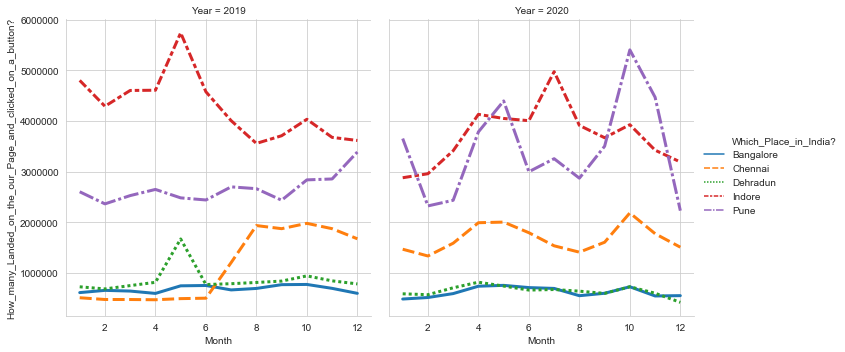

In [395]:
q1=data[["Year","Month","How_many_Landed_on_the_our_Page_and_clicked_on_a_button?","Which_Place_in_India?"]]
q1=q1.groupby(["Year","Month","Which_Place_in_India?"])["How_many_Landed_on_the_our_Page_and_clicked_on_a_button?"].sum()
q1=q1.reset_index()
q1=q1[q1["Year"]!=2021].reset_index(drop=True)
sns.relplot(
    data=q1, x="Month", y="How_many_Landed_on_the_our_Page_and_clicked_on_a_button?",
    col="Year", hue="Which_Place_in_India?",kind="line" ,style="Which_Place_in_India?",linewidth=3
)
plt.show()

<h3>2. A line graph of the actual and projected number of
“How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form _and_Completed_and_submited_the_form?”
for the months of the year 2021 & 2022</h3>

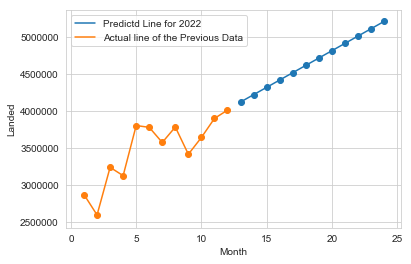

In [396]:
l=list(dic.keys())[:12]
val=list(df_22['Landed'])
# val.extend(y_Pred)
# print()
sns.lineplot(x=t_22[0],y=y_Pred,label="Predictd Line for 2022")
plt.scatter(x=t_22[0],y=y_Pred)

sns.lineplot(x=df_22["Month"],y=df_22["Landed"],label="Actual line of the Previous Data")
plt.scatter(x=l,y=val)
plt.show()

<h2>Part 6: About the Previous projects</h2>
<i><h2>Please describe any interesting project you did in the Data Science domain in more than 250 words. Attach
Github links if possible.</h2></i>


<h5>Description of the Problem</h5>
<h6><a href="https://www.kaggle.com/c/quora-question-pairs">Source Kaggle</a></h6>
<p>
    Where else but Quora can a physicist help a chef with a math problem and get cooking tips in return? Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

Currently, Quora uses a Random Forest model to identify duplicate questions. In this competition, Kagglers are challenged to tackle this natural language processing problem by applying advanced techniques to classify whether question pairs are duplicates or not. Doing so will make it easier to find high quality answers to questions resulting in an improved experience for Quora writers, seekers, and readers.
</p>
<p>
    i did't complet it yet as i run many algorithms on it and done some NLP on it using Glove it will be available soon on git hub
</p>

<h2>Part 7 : Time management</h2>
<h4>● Can you please share your thoughts, in less than 120 words, on “If you get selected, how will you manage
your time for this full-time internship opportunity”</h4>
<p>
    As i am learning yet it will be good for me if i got an opportunity. I will try my best to get the best of best benefit 
    out of this intern in terms of my skill advancement and hope fully you would also get benefit from my work.
</p>